In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
import seaborn as sns
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

##**2 Class**

# AD/CN class

In [ ]:
df_tot = pd.read_csv('/content/drive/MyDrive/Speech_Recognition/Final_Project/features_segmented4.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)




##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20,21,22], 'n_estimators':[700,1000,1200,1500]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 21, 'n_estimators': 1000}



 
 Cross_Validation Results : 
0.822 accuracy with a standard deviation of 0.023
0.893 AUC with a standard deviation of 0.018
0.814 Recall with a standard deviation of 0.037
0.816 Precision with a standard deviation of 0.036


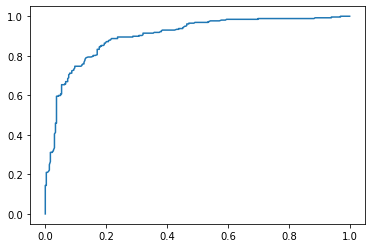

In [ ]:

clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

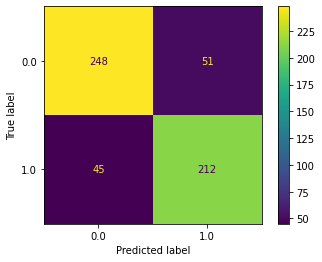

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

# Logistic Regression model

GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l2', 'solver': 'newton-cg'}

 
 Cross_Validation Results : 
0.662 accuracy with a standard deviation of 0.025
0.723 AUC with a standard deviation of 0.034
0.560 Recall with a standard deviation of 0.058
0.680 Precision with a standard deviation of 0.034


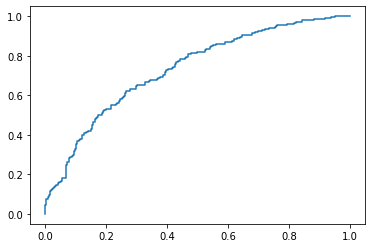

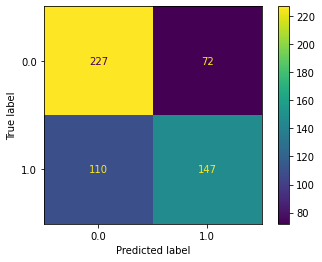

In [ ]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=8) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

# SVM model


 
 Cross_Validation Results : 
0.786 accuracy with a standard deviation of 0.022
0.865 AUC with a standard deviation of 0.029
0.771 Recall with a standard deviation of 0.034
0.782 Precision with a standard deviation of 0.034


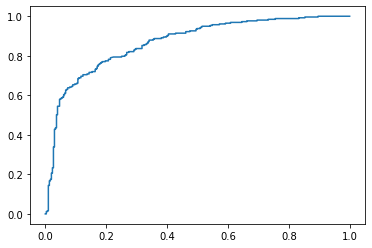

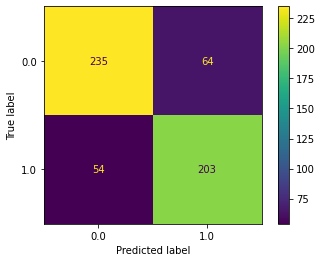

In [ ]:
from sklearn import svm
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))


test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

##**ExtraTree**


 
 Cross_Validation Results : 
0.803 accuracy with a standard deviation of 0.032
0.880 AUC with a standard deviation of 0.025
0.771 Recall with a standard deviation of 0.054
0.811 Precision with a standard deviation of 0.039

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       299
         1.0       0.81      0.81      0.81       257

    accuracy                           0.82       556
   macro avg       0.82      0.82      0.82       556
weighted avg       0.82      0.82      0.82       556



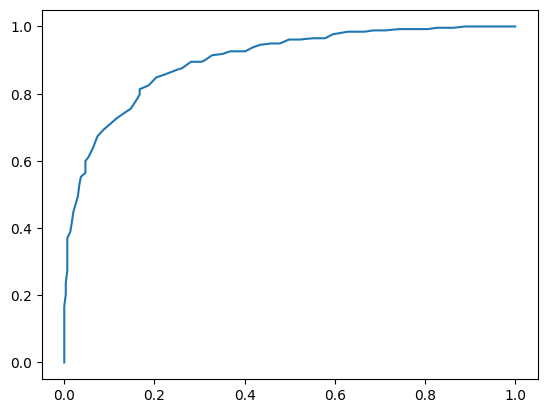

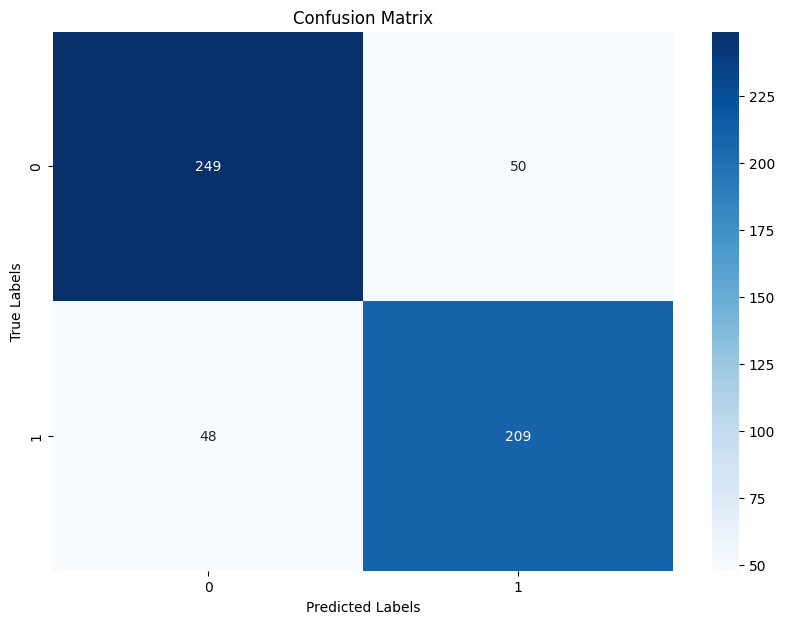

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(random_state=0)
model = clf.fit(X_scaled, y.values.ravel())

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='recall')
scores_pre = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
plt.plot(fpr, tpr)

# Get predicted labels and generate classification report
val_preds = model.predict(X_test_scaled)
print('\nClassification Report:')
print(classification_report(y_test, val_preds))

# Generate the confusion matrix
cm = confusion_matrix(y_test, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##**XGBoost**


 
 Cross_Validation Results : 
0.819 accuracy with a standard deviation of 0.016
0.898 AUC with a standard deviation of 0.015
0.812 Recall with a standard deviation of 0.024
0.811 Precision with a standard deviation of 0.025

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       299
         1.0       0.82      0.84      0.83       257

    accuracy                           0.84       556
   macro avg       0.84      0.84      0.84       556
weighted avg       0.84      0.84      0.84       556



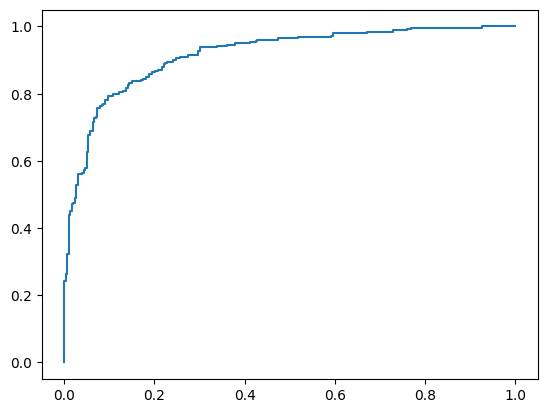

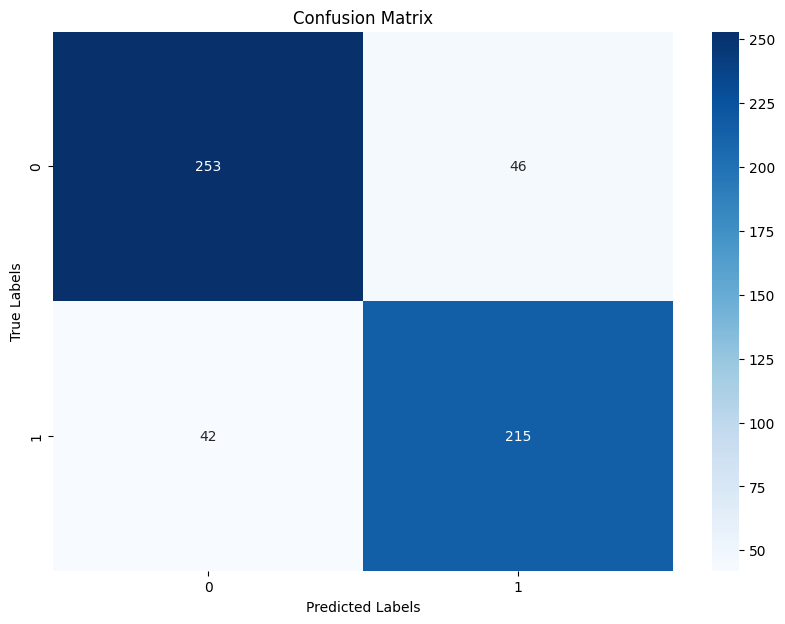

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0)
model = clf.fit(X_scaled, y.values.ravel())

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='recall')
scores_pre = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
plt.plot(fpr, tpr)

# Get predicted labels and generate classification report
val_preds = model.predict(X_test_scaled)
print('\nClassification Report:')
print(classification_report(y_test, val_preds))

# Generate the confusion matrix
cm = confusion_matrix(y_test, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##**4 class**

In [ ]:
df_tot = pd.read_csv('/content/drive/MyDrive/Speech_Recognition/Final_Project/features_segmented4.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

##**Random Forest**

In [ ]:
clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20,21,22], 'n_estimators':[700,1000,1200,1500]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 21, 'n_estimators': 700}


In [ ]:
clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



 
 Cross_Validation Results : 
0.715 accuracy with a standard deviation of 0.019
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


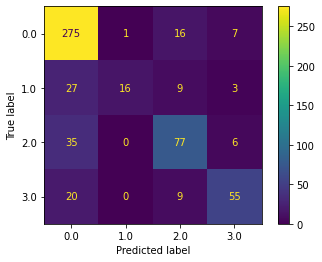

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

##**Logistic Regression model**

In [ ]:
clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=8) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l2', 'solver': 'newton-cg'}

 
 Cross_Validation Results : 
0.567 accuracy with a standard deviation of 0.012
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


##**SVM model**


 
 Cross_Validation Results : 
0.652 accuracy with a standard deviation of 0.020


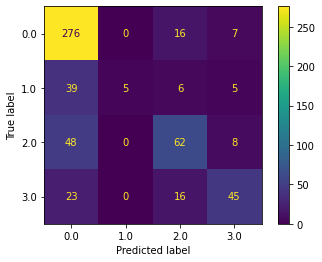

In [ ]:
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

##**ExtraTree**


 
 Cross_Validation Results : 
0.685 accuracy with a standard deviation of 0.023
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81       299
         1.0       1.00      0.24      0.38        55
         2.0       0.76      0.53      0.63       118
         3.0       0.81      0.61      0.69        84

    accuracy                           0.74       556
   macro avg       0.82      0.58      0.63       556
weighted avg       0.77      0.74      0.71       556



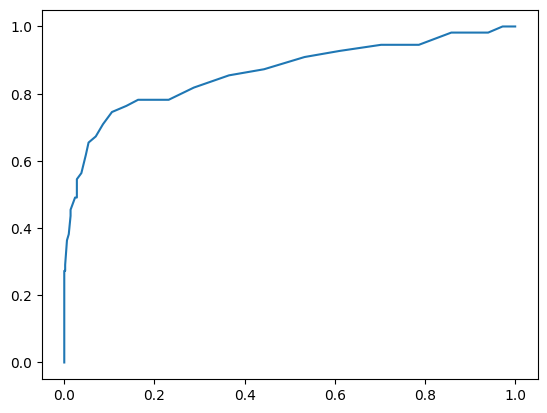

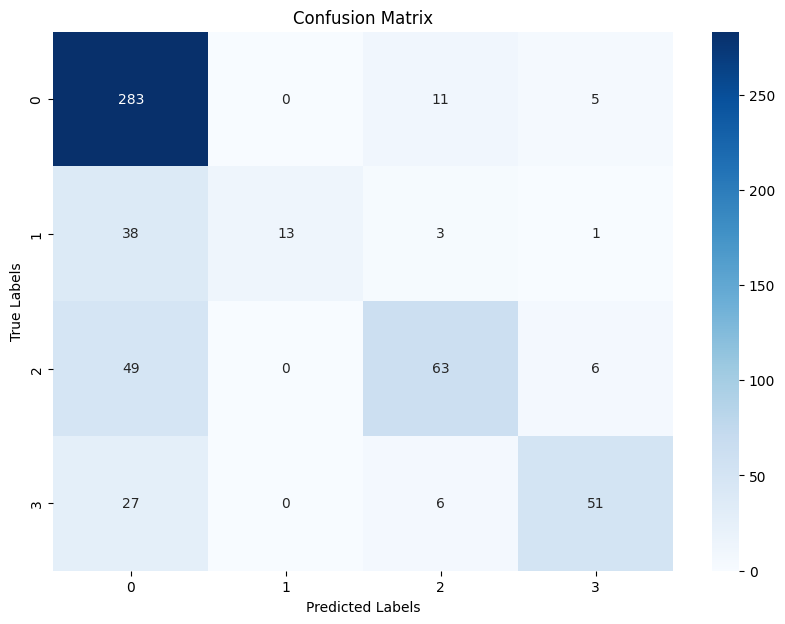

In [ ]:
clf = ExtraTreesClassifier(random_state=0)
model = clf.fit(X_scaled, y.values.ravel())

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='recall')
scores_pre = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1], pos_label=1)
plt.plot(fpr, tpr)

# Get predicted labels and generate classification report
val_preds = model.predict(X_test_scaled)
print('\nClassification Report:')
print(classification_report(y_test, val_preds))

# Generate the confusion matrix
cm = confusion_matrix(y_test, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##**XGBoost**


 
 Cross_Validation Results : 
0.737 accuracy with a standard deviation of 0.022
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       299
         1.0       1.00      0.42      0.59        55
         2.0       0.71      0.71      0.71       118
         3.0       0.75      0.75      0.75        84

    accuracy                           0.79       556
   macro avg       0.82      0.70      0.73       556
weighted avg       0.80      0.79      0.78       556



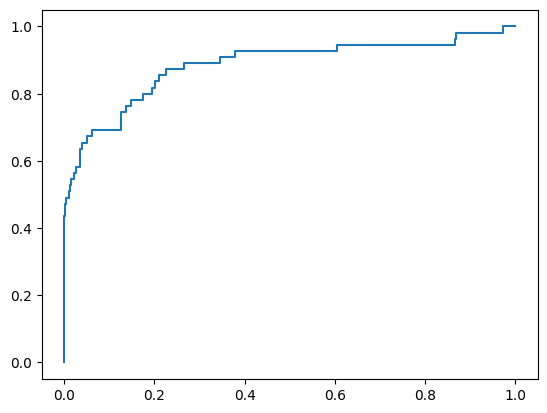

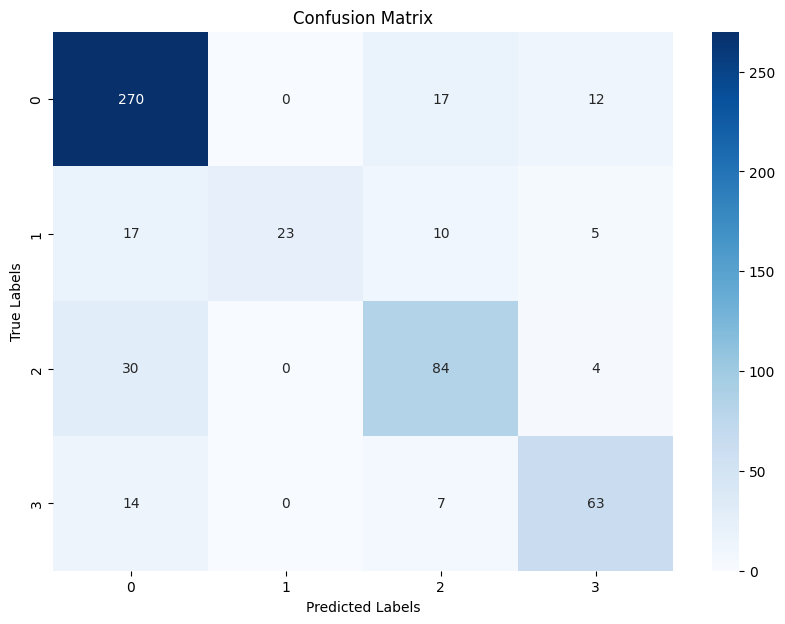

In [ ]:
clf = XGBClassifier(random_state=0)
model = clf.fit(X_scaled, y.values.ravel())

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='recall')
scores_pre = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv, scoring='precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1], pos_label=1)
plt.plot(fpr, tpr)

# Get predicted labels and generate classification report
val_preds = model.predict(X_test_scaled)
print('\nClassification Report:')
print(classification_report(y_test, val_preds))

# Generate the confusion matrix
cm = confusion_matrix(y_test, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()